# Python for (open) Neuroscience

_Lecture 1.2_ - Intro to `pandas`

Luigi Petrucco

Jean-Charles Mariani

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/lectures/Lecture1.2_Intro-pandas.ipynb)

## `numpy` booleans

A final note on `numpy` boolean indexing & arrays

### Boolean operations with arrays

In [1]:
import numpy as np

In [2]:
an_array = np.array([1, 2, 3, 4, 5])

In [3]:
condition_0 = an_array > 2
condition_1 = an_array < 5

print(condition_0)
print(condition_1)

[False False  True  True  True]
[ True  True  True  True False]


### `and` with `&`

If we try to use and with the array, it won't work element-wise!

In [6]:
condition_0 and condition_1

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

To compute the and condition element-wise we use `&`:

In [7]:
condition_0 & condition_1

array([False, False,  True,  True, False])

### `or` with `|`

To compute the or condition element-wise we use `|`:

In [8]:
condition_0 | condition_1

array([ True,  True,  True,  True,  True])

### `not` with `~`

To compute the not condition (over a single array) element-wise we use `~`:

In [9]:
~condition_0

array([ True,  True, False, False, False])

Mind the execution order!

In [122]:
an_array > 0 & an_array < 5

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

We get the error because we are not ensuring that the array comparisons are executed first!
This is how we can fix this:

In [21]:
# Correct:
(an_array > 0) & (an_array < 5)

array([ True,  True,  True,  True, False])

## `pandas`!

Or, the magic of semantic indexing and data aggregation

 - not that magical for R people. But hopefully you'll feel at home

- (also, under a geek definition of "magic"...)

### Limitations for `np.ndarray`s

We cannot work with labels (we always index with numbers)

Works only with "square" arrays (same numbers of values over every axis)

This can be a pain for real world -_i.e._, dishomogenous - data!

Also, numpy does not offer handy ways to aggregate data

## `pandas` 🐼 can help us here

In [22]:
import pandas as pd
import numpy as np

In [23]:
# get a pandas sample dataset:
def get_meteo_dataset():
    URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&hourly=temperature_2m,relativehumidity_2m,precipitation,windspeed_10m,winddirection_10m&start_date=2023-02-01&end_date=2023-05-28&format=csv"
    return pd.read_csv(URL, skiprows=3)

df = get_meteo_dataset()
df

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),windspeed_10m (km/h),winddirection_10m (°)
0,2023-02-01T00:00,4.6,77,0.1,20.9,274
1,2023-02-01T01:00,4.5,76,0.2,20.5,273
2,2023-02-01T02:00,4.5,74,0.0,20.5,273
3,2023-02-01T03:00,4.4,77,0.0,18.4,269
4,2023-02-01T04:00,4.3,77,0.0,17.1,262
...,...,...,...,...,...,...
2803,2023-05-28T19:00,18.2,59,0.0,6.9,309
2804,2023-05-28T20:00,16.8,67,0.0,5.8,356
2805,2023-05-28T21:00,15.1,74,0.0,8.1,32
2806,2023-05-28T22:00,14.2,75,0.0,8.5,36


### `pd.DataFrame` and `pd.Series`

`pd.DataFrame`/`pd.Series` are `pandas` data collection type!
 - `pd.DataFrame` is a 2D data structure
  - `pd.Series` is a 1D data structure

## `pd.DataFrame`

2D data structure with labelled **columns** and indexed **rows**

In [24]:
df = pd.DataFrame(
    data=[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]],
    columns=["col0", "col1", "col2"],
    index=["row1", "row2", "row3", "row4"],
)
df

,col0,col1,col2
row1,1,2,3
row2,4,5,6
row3,7,8,9
row4,10,11,12


Dataframes are a great way of storing multiple data for the same elements!

### `pd.DataFrame` attributes

In [25]:
df.columns  # returns the columns of the dataframe

Index(['col0', 'col1', 'col2'], dtype='object')

In [26]:
df.index  # returns the index of the dataframe

Index(['row1', 'row2', 'row3', 'row4'], dtype='object')

In [27]:
df.values # returns a numpy array of the raw data in the dataframe.

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [28]:
df.shape  # returns the shape of the dataframe, as arrays

(4, 3)

## `pd.DataFrame` default indexing

If we don't specify indexes, we get a default sequential one:

In [29]:
df = pd.DataFrame(
    data=[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]],
    columns=["col0", "col1", "col2"],
)
df

,col0,col1,col2
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


## `pd.DataFrame` indexing

Index dataframe over columns:

In [31]:
df = pd.DataFrame(
    data=[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]],
    columns=["col0", "col1", "col2"],
    index=["row1", "row2", "row3", "row4"],
)

type(df["col0"])

pandas.core.series.Series

Once we have selected a column, what we get is a `pd.Series`

### `pd.Series`

`pd.Series` are 1-dimensional data structures - basically columns of  `pd.DataFrame`s

In [32]:
a_series_from_df = df["col0"]
type(a_series_from_df)

pandas.core.series.Series

`pd.Series` have indexed rows, and a name (the name of the column they come from):

In [33]:
a_series_from_df.index

Index(['row1', 'row2', 'row3', 'row4'], dtype='object')

In [34]:
a_series_from_df.name

'col0'

### Back to indexing dataframes...

We can select multiple columns (with a list of columns):

In [35]:
df[["col0", "col2"]]

,col0,col2
row1,1,3
row2,4,6
row3,7,9
row4,10,12


We can select rows (with a list / range of rows - in this case, always a range!):

In [37]:
df["row1":"row2"]

,col0,col1,col2
row1,1,2,3
row2,4,5,6


### `.loc`

To get specific elements / Index over both rows and columns we use `.loc` (highly recommended)

This is not a method! mind the square brackets:

In [39]:
df.loc["row1", "col0"]

1

We can select multiple rows and columns (with a list / range of rows and columns):

In [40]:
df.loc["row1":"row3", "col0":"col2"]

,col0,col1,col2
row1,1,2,3
row2,4,5,6
row3,7,8,9


Often, we use boolean indexing to select rows:

In [44]:
df["col2"] > 5

row1    False
row2     True
row3     True
row4     True
Name: col2, dtype: bool

In [46]:
df.loc[df["col2"] > 5, :]

,col0,col1,col2
row2,4,5,6
row3,7,8,9
row4,10,11,12


It is very common to use multiple critieria to select rows:

In [48]:
selecting_series = (df["col2"] > 5) & (df["col1"] < 10)

In [54]:
df.loc[selecting_series, :]  # note the boolean and operation à là numpy

,col0,col1,col2
row2,4,5,6
row3,7,8,9


### `.iloc`

If we feel like using numpy-like indexing, we can use `.iloc` (usually, discouraged):

In [56]:
df.iloc[0, 0]

1

### Create `pd.DataFrames`

Tipically, we create a dataframe from a dictionary of arrays (lists):

In [60]:
dict_array = dict(int_col=[1, 2, 3], 
                  float_col=[4., 5., .6],
                  a_constant_val=1,
                  str_col=["a", "b", "c"])

pd.DataFrame(dict_array)

,int_col,float_col,a_constant_val,str_col
0,1,4.0,1,a
1,2,5.0,1,b
2,3,0.6,1,c


 or from a list of dictionaries:

In [59]:
pd.DataFrame([dict(int_col=1, float_col=4., str_col="a"),
              dict(int_col=2, float_col=5., str_col="b"),
              dict(int_col=3, float_col=.6, str_col="c")])

,int_col,float_col,str_col
0,1,4.0,a
1,2,5.0,b
2,3,0.6,c


Or, as we saw, from a numpy array:

In [61]:
twod_array = np.random.rand(3, 3)
twod_array

array([[0.2303965 , 0.26447577, 0.36732304],
       [0.79817935, 0.5906492 , 0.88905246],
       [0.02050223, 0.64918044, 0.40489264]])

In [62]:
pd.DataFrame(twod_array, columns=["a", "b", "c"], index=["row1", "row2", "row3"])

,a,b,c
row1,0.230396,0.264476,0.367323
row2,0.798179,0.590649,0.889052
row3,0.020502,0.649180,0.404893


### Reading from files

Many (most?) times we'll be reading directly from a file (a `.csv`, a `.xlsx`...)

In [65]:
# For .csv files, we use the read_csv method.
# In this notebook we read from the web; if it was a file from your pc, you'd pass the filename
# instead of the URL. read_csv takes a bunch of inputs about how your file is formatted

URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&hourly=temperature_2m,relativehumidity_2m,precipitation,windspeed_10m,winddirection_10m&start_date=2023-02-01&end_date=2023-05-28&format=csv"
df = pd.read_csv(URL, skiprows=3)

df.head()  # this will show only the first rows!

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),windspeed_10m (km/h),winddirection_10m (°)
0,2023-02-01T00:00,4.6,77,0.1,20.9,274
1,2023-02-01T01:00,4.5,76,0.2,20.5,273
2,2023-02-01T02:00,4.5,74,0.0,20.5,273
3,2023-02-01T03:00,4.4,77,0.0,18.4,269
4,2023-02-01T04:00,4.3,77,0.0,17.1,262


### Add new columns

We can add new columns to a dataframe:

In [66]:
df = pd.DataFrame(np.random.rand(3, 3), columns=["a", "b", "c"], index=["row1", "row2", "row3"])
df

,a,b,c
row1,0.642151,0.659450,0.338003
row2,0.143122,0.242077,0.264976
row3,0.579464,0.235423,0.819173


In [67]:
df["a_new_column"] = ["a", "b", "c"]
df

,a,b,c,a_new_column
row1,0.642151,0.659450,0.338003,a
row2,0.143122,0.242077,0.264976,b
row3,0.579464,0.235423,0.819173,c


### Add new rows

We can add new rows to a dataframe (more rare). In this case we use concatenation:

In [68]:
df1 = pd.DataFrame(dict(col1=[99, 95, 92],
                        col2=[95, 90, 99]))

# Create another dataframe:
df2 = pd.DataFrame(dict(col1=[100],
                        col2=[101]))
#
# Concat dataframes
pd.concat([df1, df2])

,col1,col2
0,99,95
1,95,90
2,92,99
0,100,101


Note how indexes match the indexes of the original arrays! If we want, we can reassign it:

In [70]:
pd.concat([df1, df2]).reset_index()

,index,col1,col2
0,0,99,95
1,1,95,90
2,2,92,99
3,0,100,101


(Practicals 1.2.0)

### `pd.DataFrame`'s methods

`pd.DataFrame`s and `pd.Series` have many, many methods!

(Why those are methods and not functions? There's a reason, we'll get to that...)

It is actually way too many to cover in a single lecture! It is more important to know that they exist, and to know how to find them! (google, stackoverflow, pandas documentation, chatGPT...)

### Methods to change the df content

Methods to drop rows/columns:

In [71]:
dict_array = dict(int_col=[3, 2, 1, 1], float_col=[4., 5., .6, 7.], str_col=["a", "d", "c", "a"])
df = pd.DataFrame(dict_array)

df

,int_col,float_col,str_col
0,3,4.0,a
1,2,5.0,d
2,1,0.6,c
3,1,7.0,a


In [73]:
df.drop(columns=["int_col", "str_col"])  # drop columns

,float_col
0,4.0
1,5.0
2,0.6
3,7.0


In [74]:
df.drop(index=[0, 2])  # drop rows

,int_col,float_col,str_col
1,2,5.0,d
3,1,7.0,a


Methods to sort rows/columns:

In [75]:
df.sort_values(by="int_col") # sort by a column

,int_col,float_col,str_col
2,1,0.6,c
3,1,7.0,a
1,2,5.0,d
0,3,4.0,a


In [ ]:
df.sort_values(by=["int_col", "float_col"])  # sort by multiple columns

### Methods for statistics

In [76]:
df = get_meteo_dataset()

df.head()  # show first 5 rows

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),windspeed_10m (km/h),winddirection_10m (°)
0,2023-02-01T00:00,4.6,77,0.1,20.9,274
1,2023-02-01T01:00,4.5,76,0.2,20.5,273
2,2023-02-01T02:00,4.5,74,0.0,20.5,273
3,2023-02-01T03:00,4.4,77,0.0,18.4,269
4,2023-02-01T04:00,4.3,77,0.0,17.1,262


In [86]:
means = df[["temperature_2m (°C)", "precipitation (mm)"]].mean()
means

temperature_2m (°C)    7.963355
precipitation (mm)     0.073504
dtype: float64

In [78]:
df["temperature_2m (°C)"].median()

7.8

In [79]:
df["temperature_2m (°C)"].std()

6.063801006799269

In [87]:
df[["temperature_2m (°C)", "precipitation (mm)", "windspeed_10m (km/h)"]].describe()

,temperature_2m (°C),precipitation (mm),windspeed_10m (km/h)
count,2808.000000,2808.000000,2808.000000
mean,7.963355,0.073504,10.368091
std,6.063801,0.384389,5.015647
min,-7.400000,0.000000,0.400000
25%,3.300000,0.000000,6.400000
50%,7.800000,0.000000,9.700000
75%,11.800000,0.000000,13.700000
max,25.800000,14.200000,31.300000


### `pd.DataFrame`'s plotting methods

`pd.DataFrame`s and `pd.Series` have many, many plotting methods!

<Axes: >

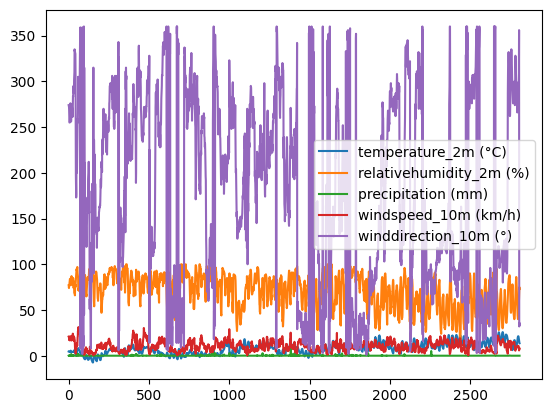

In [88]:
df.plot()

<Axes: >

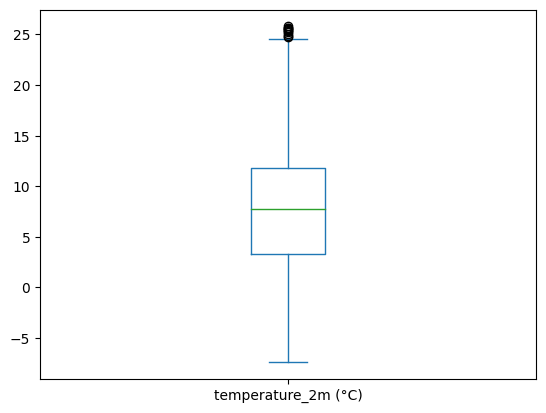

In [89]:
df["temperature_2m (°C)"].plot(kind="box")

<Axes: ylabel='Frequency'>

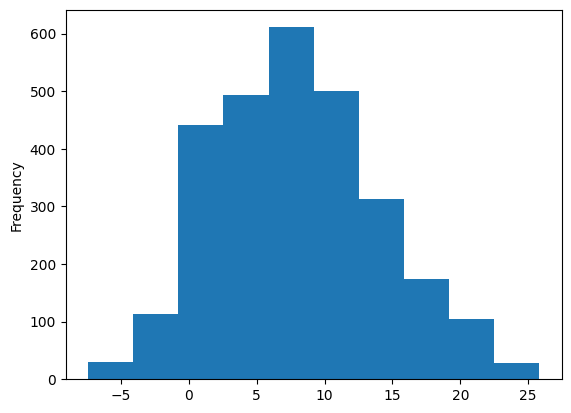

In [90]:
df["temperature_2m (°C)"].plot(kind="hist")

<Axes: xlabel='temperature_2m (°C)', ylabel='precipitation (mm)'>

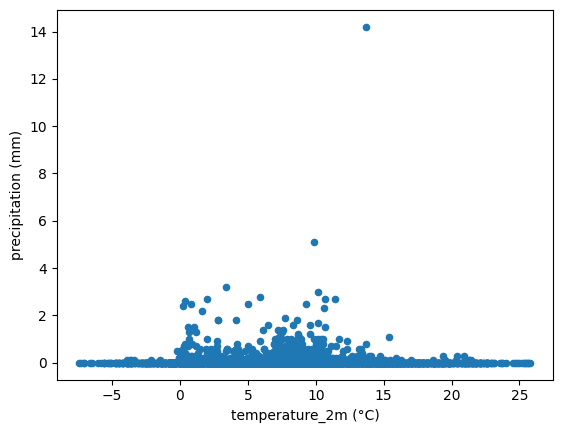

In [91]:
df.plot(kind="scatter", x="temperature_2m (°C)", y="precipitation (mm)")

### Methods to deal with missing data

As in numpy, we represent missing data by `NaN` (not a number).

In [92]:
df = pd.DataFrame(dict(a=[1, 2, np.nan, 4], b=[0, np.nan, 4, 5]))

To deal with missing data, we can use `pd.DataFrame`'s interpolation methods. By default, it will use linear interpolation:

In [93]:
df

,a,b
0,1.0,0.0
1,2.0,NaN
2,NaN,4.0
3,4.0,5.0


In [94]:
df.interpolate()

,a,b
0,1.0,0.0
1,2.0,2.0
2,3.0,4.0
3,4.0,5.0


(Practicals 1.2.1)